# Bike Sharing Case Study

### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## 1. Reading and understanding the data

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
bs = pd.read_csv('day.csv')
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Checking the shape of the dataset
bs.shape

(730, 16)

In [4]:
#Checking the null values in the dataset
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## 2. Pre-processing the data

In [5]:
#Dropping the dteday column as month and year are already given in other columns
#Dropping the casual and registered column as target variable column cnt is the combination of and correlated with both the columns
bs = bs.drop(['instant','dteday','casual','registered'], axis = 1)

In [6]:
#Mapping all the non-binary categorical columns to their original values
#Mapping the season column
bs['season'] = bs['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

#Mapping the year column
bs['yr'] = bs['yr'].map({0:'2018', 1:'2019'})

#Mapping the mnth column
bs['mnth'] = bs['mnth'].map({1:'jan', 2:'feb', 3:'march', 4:'april', 5:'may', 6:'june', 7:'july', 8:'aug', 9:'sept', 10:'oct', 11:'nov', 12:'dec'})

#Mapping the weekday column
bs['weekday'] = bs['weekday'].map({0: 'sun', 1:'mon', 2:'tues', 3:'wed', 4:'thurs', 5:'fri', 6:'sat',})

#Mapping the weathersit column
bs['weathersit'] = bs['weathersit'].map({1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow, Light Rain', 4:'Heavy Rain + Ice Pallets'})

In [7]:
bs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,tues,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## 3. Exploratory Data Analysis (EDA)

### 1. Univariate Analysis

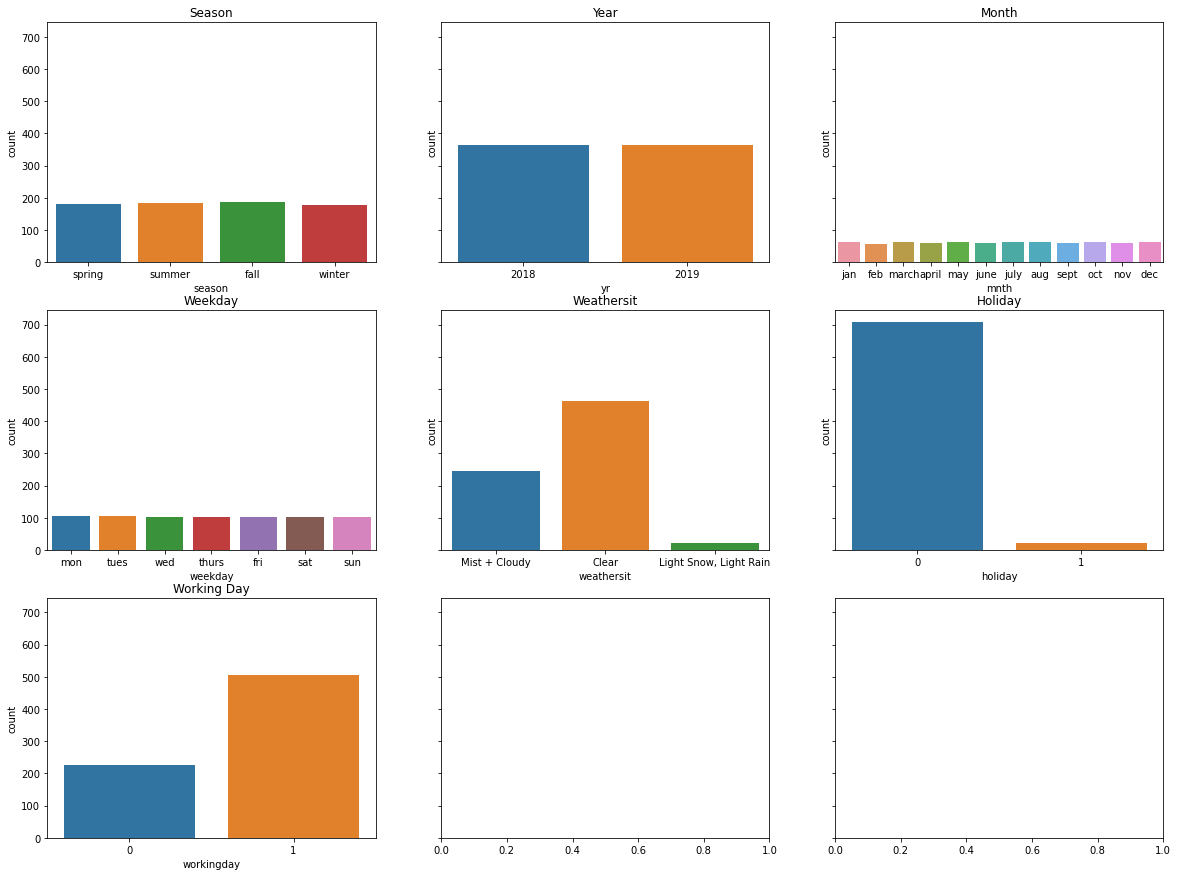

In [8]:
#Analyzing the categorical variables
fig, axes = plt.subplots(3, 3, figsize=(20, 15), sharey=True)
var1 = len(bs.season)
var2 = len(bs.yr)
var3 = len(bs.mnth)
var4 = len(bs.weekday)
var5 = len(bs.weathersit)
var6 = len(bs.holiday)
var7 = len(bs.workingday)
var8 = len(bs.temp)
var9 = len(bs.atemp)
var10 = len(bs.hum)
var11 = len(bs.windspeed)

rep = sns.countplot(ax=axes[0][0], x='season', data=bs)
axes[0][0].set_title('Season')

dflt = sns.countplot(ax=axes[0][1], x='yr', data=bs)
axes[0][1].set_title('Year')

dflt = sns.countplot(ax=axes[0][2], x='mnth', data=bs)
axes[0][2].set_title('Month')

dflt = sns.countplot(ax=axes[1][0], x='weekday', data=bs)
axes[1][0].set_title('Weekday')

dflt = sns.countplot(ax=axes[1][1], x='weathersit', data=bs)
axes[1][1].set_title('Weathersit')

dflt = sns.countplot(ax=axes[1][2], x='holiday', data=bs)
axes[1][2].set_title('Holiday')

dflt = sns.countplot(ax=axes[2][0], x='workingday', data=bs)
axes[2][0].set_title('Working Day')

plt.show()

In [9]:
#Analyzing the numerical variables
bs.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### 2. Bivariate Analysis

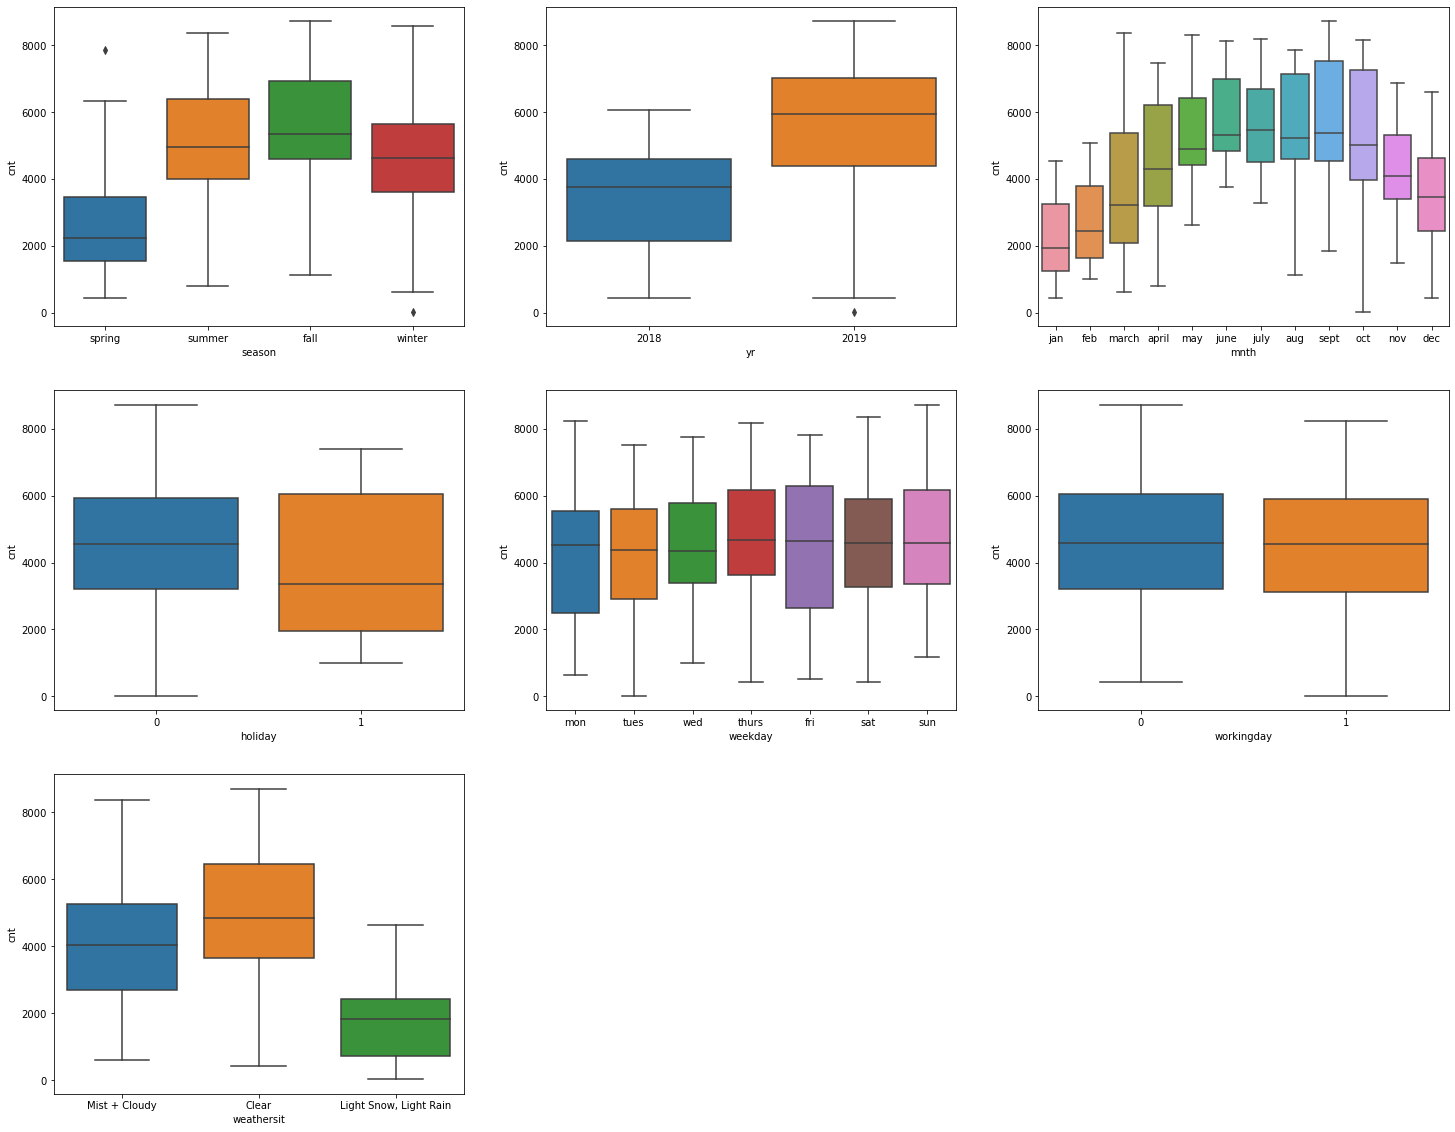

In [10]:
#Visualizing the categorial variables
plt.figure(figsize = (25,20))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bs)

plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=bs)

plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=bs)

plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=bs)

plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=bs)

plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=bs)

plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=bs)

plt.show()

#### Observations:

1. Season: Fall season has demand for renting bikes, following with summer season.
2. Year in demand: Clearly, 2019 has high demand for renting bikes as compared to 2018.
3. Month: As fall season has highest demand, months august, september and october has highest number of bike rentals.
4. Holiday: On holidays, demand for bike rentals has decreased.
5. Weekday: On all days of the week, bike rentals are nearly same.
6. Working Day: Working day or weekend has similar demand.
7. Clear weather has clearly high demand for bike rentals.

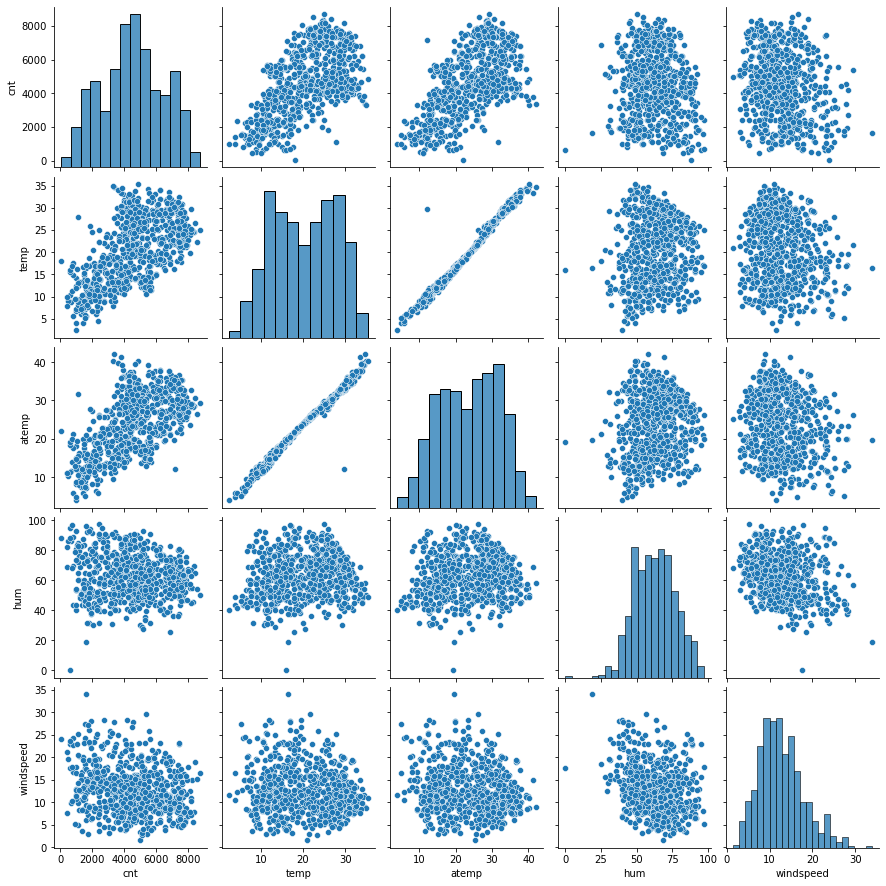

In [11]:
#Visualizing the numerical variables
sns.pairplot(data=bs,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Observation: temp and atemp variables are highly correlated with each other. Also, temp and atemp variables have some correlation with cnt variable.

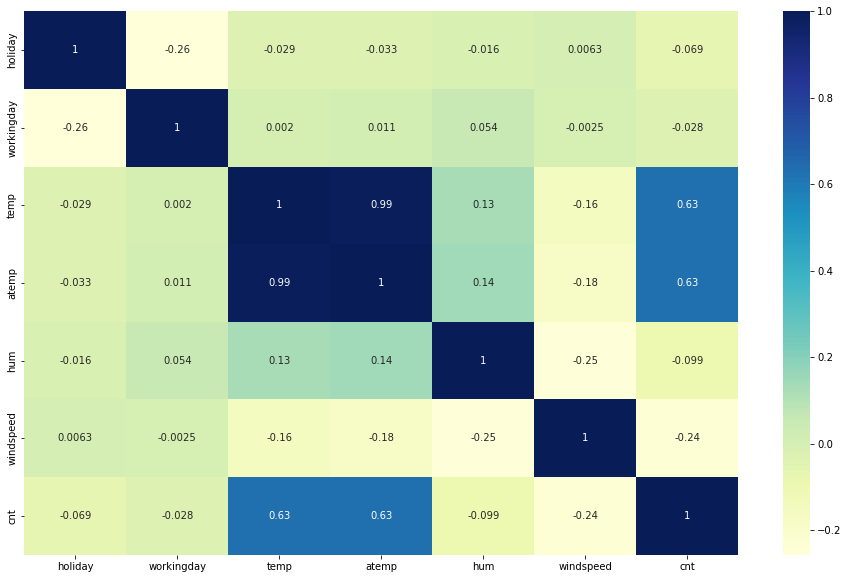

In [12]:
#Correlation using heatmap
plt.figure(figsize = (16, 10))
sns.heatmap(bs.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

#### Observation: 
1. temp and atemp variables are highly correlated with each other. Also, temp and atemp variables have some correlation with cnt variable.
2. All the other variables has little correlation with cnt variable.

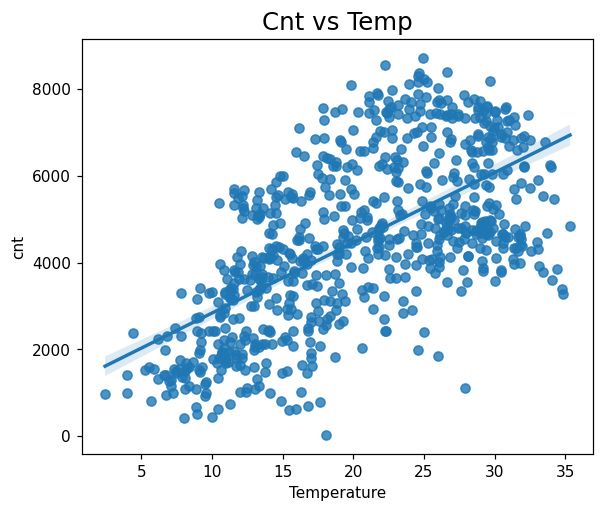

In [13]:
#Creating regplot between cnt and independent variables
#cnt vs temp
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bs,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### Observation: Correlation between cnt and temp is positive, on increase of temperature, cnt variable (bike rentals) increase.

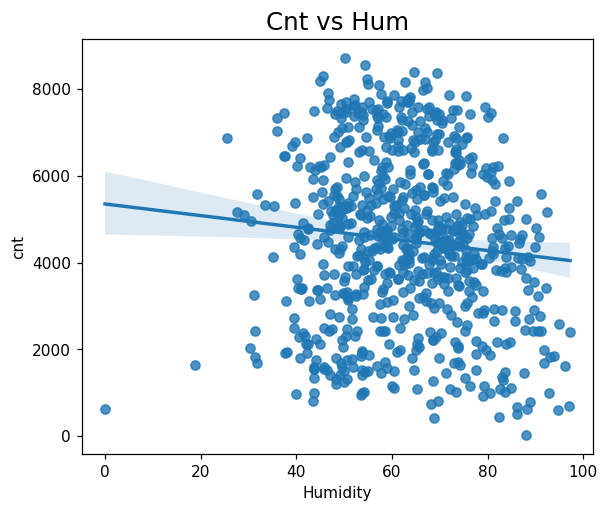

In [14]:
#cnt vs humidity
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bs,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### Observation: Correlation between cnt and humidity is negative, on increase of humidity, cnt variable (bike rentals) decrease.

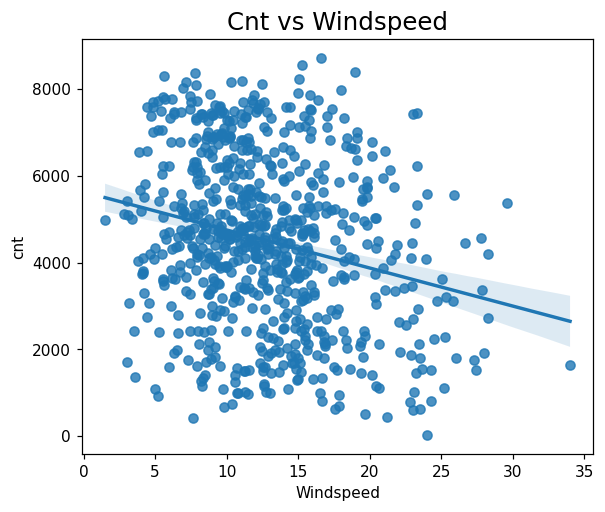

In [15]:
#cnt vs windspeed
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bs,y="cnt",x="windspeed")
plt.xlabel("Windspeed")
plt.show()

#### Observation: Correlation between cnt and windspeed is negative, on increase of windspeed, cnt variable (bike rentals) decrease.

## 4. Preparing the dataset for making model

In [16]:
bs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,tues,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
#Creating dummy variables for all non-binary categorical variables
dummy1 = pd.get_dummies(bs['season'])
dummy2 = pd.get_dummies(bs['yr'])
dummy3 = pd.get_dummies(bs['mnth'])
dummy4 = pd.get_dummies(bs['weekday'])
dummy5 = pd.get_dummies(bs['weathersit'])

In [18]:
#Reducing 1 variable
dummy1 = pd.get_dummies(bs['season'], drop_first = True)
dummy2 = pd.get_dummies(bs['yr'], drop_first = True)
dummy3 = pd.get_dummies(bs['mnth'], drop_first = True)
dummy4 = pd.get_dummies(bs['weekday'], drop_first = True)

In [19]:
#Concatenating the dummy dataframe with the main dataframe
bs = pd.concat([bs, dummy1, dummy2, dummy3, dummy4, dummy5], axis=1)
bs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sept,mon,sat,sun,thurs,tues,wed,Clear,"Light Snow, Light Rain",Mist + Cloudy
0,spring,2018,jan,0,mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,...,0,1,0,0,0,0,0,0,0,1
1,spring,2018,jan,0,tues,1,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,1,0,0,0,1
2,spring,2018,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,1,0,0
3,spring,2018,jan,0,thurs,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,1,0,0,1,0,0
4,spring,2018,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [20]:
#Dropping the non-binary categorical variables
bs = bs.drop(['season', 'yr', 'weekday', 'mnth', 'weathersit'], axis=1)
bs.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,sept,mon,sat,sun,thurs,tues,wed,Clear,"Light Snow, Light Rain",Mist + Cloudy
0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## 5. Train-Test Split

In [21]:
#Splitting the data into train and test
bs_train, bs_test = train_test_split(bs, train_size=0.7, random_state = 100)
print(bs_train.shape)
print(bs_test.shape)

(510, 31)
(220, 31)


## 6. Rescaling the features

In [22]:
# Rescaling the features using MinMax Scaling
#1. Instantiate the object
scaler = MinMaxScaler()

#Creating the list of all numerical variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

#2. Fit on the data
bs_train[num_vars] = scaler.fit_transform(bs_train[num_vars])
bs_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,sept,mon,sat,sun,thurs,tues,wed,Clear,"Light Snow, Light Rain",Mist + Cloudy
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,1,0,0,0,0,0,1


## 7. Feature Selection and Model Building

In [23]:
#Creating X and y variables
y_train = bs_train.pop('cnt')
X_train = bs_train

In [24]:
#Building a linear regression model using sklearn for RFE
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
#Selecting top 15 features using RFE
rfe = RFE(estimator = LinearRegression(), n_features_to_select = 15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [26]:
#Variables selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019', True, 1),
 ('aug', False, 11),
 ('dec', False, 2),
 ('feb', False, 3),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 13),
 ('march', False, 16),
 ('may', False, 10),
 ('nov', True, 1),
 ('oct', False, 14),
 ('sept', True, 1),
 ('mon', False, 9),
 ('sat', False, 6),
 ('sun', False, 7),
 ('thurs', False, 15),
 ('tues', False, 8),
 ('wed', False, 12),
 ('Clear', True, 1),
 ('Light Snow, Light Rain', True, 1),
 ('Mist + Cloudy', True, 1)]

In [27]:
#Printing columns selected by RFE
X_train.columns[rfe.support_]

Index(['holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2019', 'jan', 'july', 'nov', 'sept', 'Clear', 'Light Snow, Light Rain',
       'Mist + Cloudy'],
      dtype='object')

In [28]:
#Making a separate dataframe of 15 columns for building models
X_train_rfe = X_train[['holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2019', 'jan', 'july', 'nov', 'sept', 'Clear', 'Light Snow, Light Rain',
       'Mist + Cloudy']]

In [29]:
X_train_rfe.shape

(510, 15)

### Creating functions

In [30]:
#Function to create model using statsmodels api
def model_build(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [31]:
#Function to calculate VIF
def calculate_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

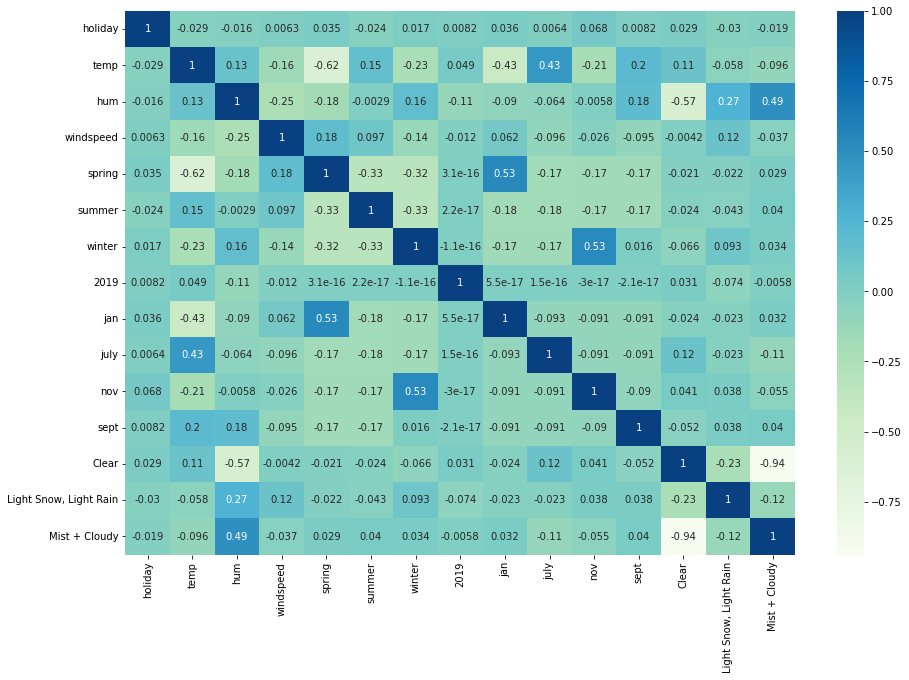

In [32]:
plt.figure(figsize = (15,10))
sns.heatmap(bs[['holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2019', 'jan', 'july', 'nov', 'sept', 'Clear', 'Light Snow, Light Rain',
       'Mist + Cloudy']].corr(), cmap='GnBu', annot=True)
plt.show()

### Building models
### Model 1

In [33]:
#Making model 1 with all 15 variables selected by RFE

cols = ['holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2019', 'jan', 'july', 'nov', 'sept', 'Clear', 'Light Snow, Light Rain',
       'Mist + Cloudy']

model_build(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          4.41e-189
Time:                        21:58:04   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### Observation: 'nov' column has p-value > 0.05, so it should be dropped

### Model 2

In [34]:
#Creating model 2 by dropping 'nov' column
cols = ['holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2019', 'jan', 'july', 'sept', 'Clear', 'Light Snow, Light Rain',
       'Mist + Cloudy']

model_build(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          7.59e-190
Time:                        21:58:05   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### Observation: 'jan' column has p-value > 0.05, so it should be dropped

### Model 3

In [35]:
#Creating model 3 by dropping 'jan' column
cols = ['holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2019', 'july', 'sept', 'Clear', 'Light Snow, Light Rain',
       'Mist + Cloudy']

model_build(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.95e-190
Time:                        21:58:05   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Observation: Now, all the columns have p-value < 0.5, so checking VIF to drop insignificant variables. 'Clear' column should be dropped as it has very high VIF

### Model 4

In [36]:
#Creating model 4 by dropping 'clear' column
cols = ['holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2019', 'july', 'sept', 'Light Snow, Light Rain',
       'Mist + Cloudy']

model_build(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.95e-190
Time:                        21:58:05   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Observation: VIFs for several columns has changed. 'hum' variable should be dropped as it has high VIF

### Model 5

In [37]:
#Creating model 5 by dropping 'hum' column
cols = ['holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       '2019', 'july', 'sept', 'Light Snow, Light Rain',
       'Mist + Cloudy']

model_build(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          5.06e-187
Time:                        21:58:05   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Observation: 'temp' variable should be dropped as it has high VIF

### Model 6

In [38]:
#Creating model 6 by dropping 'temp' column
cols = ['holiday', 'windspeed', 'spring', 'summer', 'winter',
       '2019', 'july', 'sept', 'Light Snow, Light Rain',
       'Mist + Cloudy']

model_build(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          5.02e-149
Time:                        21:58:05   Log-Likelihood:                 406.16
No. Observations:                 510   AIC:                            -790.3
Df Residuals:                     499   BIC:                            -743.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Observation: In this model, p-value of 'july' variable has increased.

### Model 7

In [39]:
#Creating model 7 by replacing 'july' with 'temp' variable as ther were highly correlated
cols = ['holiday', 'windspeed', 'spring', 'summer', 'winter',
       '2019', 'temp', 'sept', 'Light Snow, Light Rain',
       'Mist + Cloudy']

model_build(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          1.47e-186
Time:                        21:58:05   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Observation: 'windspeed' has high VIF, so it should be dropped.

### Model 8

In [40]:
#Creating model 8 by dropping windspeed column
cols = ['holiday', 'summer', 'winter',
       '2019', 'temp', 'sept', 'Light Snow, Light Rain',
       'Mist + Cloudy']

model_build(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     281.4
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          6.82e-180
Time:                        21:58:06   Log-Likelihood:                 473.31
No. Observations:                 510   AIC:                            -928.6
Df Residuals:                     501   BIC:                            -890.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Observation: VIF for all the columns is less than 3

### Model 9

In [41]:
#Creating model 9 by adding 'spring' column
cols = ['holiday', 'summer', 'winter',
       '2019', 'temp', 'sept', 'Light Snow, Light Rain',
       'Mist + Cloudy', 'spring']

model_build(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.2
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          1.33e-180
Time:                        21:58:06   Log-Likelihood:                 477.90
No. Observations:                 510   AIC:                            -935.8
Df Residuals:                     500   BIC:                            -893.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Observations: 
1. All the VIFs of model 9 are below 3 and p-values are almost 0.
2. R2 score is 0.82 (greater than 0.80) which tells us that the performance of the model is good.
3. Difference between R2 and Adjusted R2 is very less (less than 5%).
4. R2 score, Adjusted R2 and F-statistic values of model 8 are high.
5. Our final model is model 9.

### Building Final Model

In [42]:
#Building final model using sk_learn
cols = ['holiday', 'summer', 'winter',
       '2019', 'temp', 'sept', 'Light Snow, Light Rain',
       'Mist + Cloudy', 'spring']

lr1 = LinearRegression()
lr1.fit(X_train[cols], y_train)
print(lr1.intercept_, lr1.coef_)

0.14139574908051505 [-0.09910906  0.05231142  0.09568448  0.23316154  0.48960524  0.09541525
 -0.2997988  -0.07702273 -0.06477416]


## 8. Model Evaluation

### Residual Analysis

In [43]:
#Prediction
y_train_pred = lr1.predict(X_train[cols])

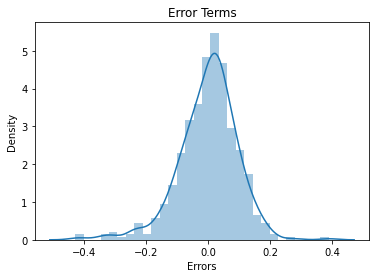

In [44]:
#Plotting a histogram
sns.distplot(y_train-y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

### Observation: Errors are normally distributed and the mean is approximately 0.

In [45]:
#R-squared Value for train predictions
r2_score(y_train,y_train_pred)

0.8212172937848272

In [46]:
#Adjusted R-squared Value for train predictions
Adj_r2 = 1 - (1-r2_score(y_train, y_train_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(Adj_r2)

0.8100200470490126


### Observation: Difference between R2 and adjusted R2 for train dataset is less than 5%

In [47]:
# Rescaling the features using MinMax Scaling for test dataset
#Creating the list of all numerical variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

#2. Transform on the test data
bs_test[num_vars] = scaler.transform(bs_test[num_vars])

In [48]:
#Creating X and y variables
y_test = bs_test.pop('cnt')
X_test = bs_test

In [49]:
#Columns from our final model
cols = ['holiday', 'summer', 'winter',
       '2019', 'temp', 'sept', 'Light Snow, Light Rain',
       'Mist + Cloudy', 'spring']

#Predict the values for test data
y_test_pred = lr1.predict(X_test[cols])

In [50]:
#R2 score for test predictions
r2_score(y_train, y_train_pred)

0.8212172937848272

In [51]:
#Adjusted R-squared value for test predictions
Adj_r2 = 1 - (1-r2_score(y_test, y_test_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(Adj_r2)

0.7787178585402075


### Observation: Difference between R2 and adjusted R2 for test dataset is less than 5%

## 9. Conclusion

#### Important variables to predict the demand of bike sharing
1. Holiday
2. Summer season
3. Winter season
4. '2019' year
5. temp
6. september month
7. Light snow
8. Light Rain
9. Mist + Cloudy
10. Spring season

#### Final Equation:
Y = β0 + β1X1 + β2X2 +...+ βpXp + ϵ

cnt = 0.1414 - 0.0991 (holiday) + 0.0523 (summer) + 0.0957 (winter) + 0.2332 (2019) + 0.4896 (temp) + 0.0954 (sept) - 0.2998 (Light Snow, Light Rain) - 0.0770 (Mist + Cloudy) - 0.0648 (spring)

#### Summary:
1. Variables like holiday, Light Snow, Light Rain, Mist + Cloudy, and spring negatively affects the independent variable. In these weathers, on holidays and in spring season demand for bike sharing will decrease.
2. Demand for bike sharing will increase in summer and winter season.
3. Also, demand for bike sharing will increase in september month.
4. Temperature has the highest positive coefficient, which means that demand for bike sharing will hugely depend on temperature.

BoomBikes should consider these factors to understand the demand evels and meet the customer's expectations.